## Observations and Insights 

In [234]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [2]:
# getting to know data - any null values ?
study_results.isnull().values.any()
mouse_metadata.isnull().values.any()

False

In [3]:
# getting to know data number of uniques and mouse_metada view
print(f'\n metadata \n {mouse_metadata.nunique()}\n')
print(f'study\n {study_results.nunique()}')
mouse_metadata


 metadata 
 Mouse ID        249
Drug Regimen     10
Sex               2
Age_months       24
Weight (g)       16
dtype: int64

study
 Mouse ID               249
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
# getting to know data view of study_results
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# left merge  data frames on Mouse Id - primary is Study Results  
data_df=study_results.merge(mouse_metadata, how="left",on='Mouse ID')
data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice.
total_mice=data_df['Mouse ID'].nunique()
total_mice

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# grouping data by mouse Id and getting count and unique count for each timepoint
agg_func={'Timepoint':['count','nunique']}
timepoint_df=data_df.groupby(['Mouse ID']).agg(agg_func)
# finding and storing every row with number of unique not equal to count - this will indeicate duplicate data 
bad_data_df=timepoint_df.loc[timepoint_df[(         'Timepoint',   'count')]!=timepoint_df[(         'Timepoint', 'nunique')]]
bad_data_df

Timepoint        
             count nunique
Mouse ID                  
g989            13       8

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
# this loop below will only run once ... but still if there would be more duplicates ... 
from IPython.core.display import HTML # to print for debug
for i in bad_data_df.index:
    print(i)
    display(HTML(data_df.loc[data_df['Mouse ID']==i].to_html())) # debug display data to be deleted
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
    clean_df=data_df.drop(data_df.loc[data_df['Mouse ID']==i].index)


g989


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Checking the number of mice in the clean DataFrame.
total_mice=clean_df['Mouse ID'].nunique()
total_mice

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


In [11]:
# st.sem(clean_df.loc[clean_df['Drug Regimen']=="Ceftamin"]['Tumor Volume (mm3)']).round(6) # debug on formula


In [12]:
# getting pretty useless summary statistics table  for tumor volume group by on regiment and aggregate stats functions
agg_func={'Tumor Volume (mm3)':['count','max', 'min','mean','median','var','std',st.sem]}
regiment_df=clean_df.groupby(['Drug Regimen']).agg(agg_func).sort_values(('Tumor Volume (mm3)',  'sem'))
# print(regiment_df.columns) # debug print -  to get columns names
regiment_df

Tumor Volume (mm3)                                              \
                          count        max        min       mean     median   
Drug Regimen                                                                  
Ramicane                    228  47.622816  22.050126  40.216745  40.673236   
Capomulin                   230  48.158209  23.343598  40.675741  41.557809   
Ceftamin                    178  68.923185  45.000000  52.591172  51.776157   
Infubinol                   178  72.226731  36.321346  52.884795  51.820584   
Zoniferol                   182  73.324432  45.000000  53.236507  51.818479   
Propriva                    148  72.455421  45.000000  52.320930  50.446266   
Stelasyn                    181  75.123690  45.000000  54.233149  52.431737   
Placebo                     181  73.212939  45.000000  54.033581  52.288934   
Naftisol                    186  76.668817  45.000000  54.331565  52.509285   
Ketapril                    188  78.567014  45.000000  55.235638  53.698743   

                                             
                    var       std       sem  
Drug Regimen                                 
Ramicane      23.486704  4.846308  0.320955  
Capomulin     24.947764  4.994774  0.329346  
Ceftamin      39.290177  6.268188  0.469821  
Infubinol     43.128684  6.567243  0.492236  
Zoniferol     48.533355  6.966589  0.516398  
Propriva      43.852013  6.622085  0.544332  
Stelasyn      59.450562  7.710419  0.573111  
Placebo       61.168083  7.821003  0.581331  
Naftisol      66.173479  8.134708  0.596466  
Ketapril      68.553577  8.279709  0.603860

In [13]:
# setting up slightly biggers plot size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size


## Bar and Pie Charts

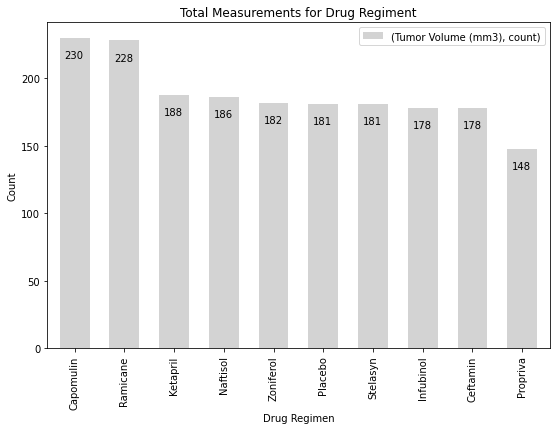

In [23]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
my_series=regiment_df[('Tumor Volume (mm3)',  'count')].sort_values(ascending=False)
#plot1=my_series.plot(kind='bar',title='Total Measurements',rot=90 )
plot1=my_series.plot.bar(title='Total Measurements for Drug Regiment',
                         rot=90, color="lightgrey",
                         width=0.6 )
for i,d in enumerate(my_series):
    plt.text(x=i-.2 , y =d-15 , s=f"{d}" , fontdict=dict(fontsize=10))
plt.ylabel('Count')
plot1.legend()

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

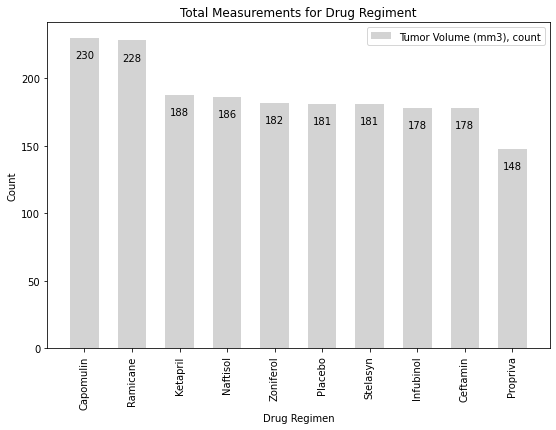

In [24]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plot2=plt.bar(my_series.index,my_series,
              color="lightgrey",
              label='Tumor Volume (mm3), count',
              width=0.6)



for i,d in enumerate(my_series):
    plt.text(x=i-.2 , y =d-15 , s=f"{d}" , fontdict=dict(fontsize=10))
plt.title('Total Measurements for Drug Regiment')
plt.ylabel('Count')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# group by clean df by Sex and get count 
agg_func={'Sex':'count'}
sex_df=clean_df.groupby(['Sex']).agg(agg_func)
sex_df

,Sex
Sex,
Female,922
Male,958


<function matplotlib.pyplot.show(*args, **kw)>

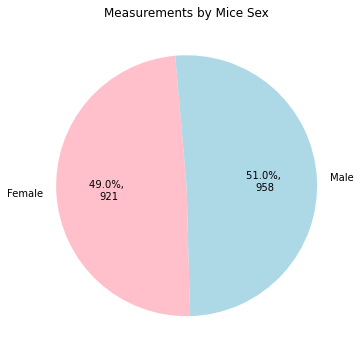

In [26]:
my_series=sex_df['Sex']
total=sex_df['Sex'].sum()
colors=["pink","lightblue"]
explode=(0.1,0.0)
plot3=my_series.plot.pie(colors=colors, 
                         title="Measurements by Mice Sex", 
                         autopct=lambda x:f'{round(x,1)}%, \n{int(x * total / 100)}', 
                         startangle=95)
plt.ylabel('')
plt.show

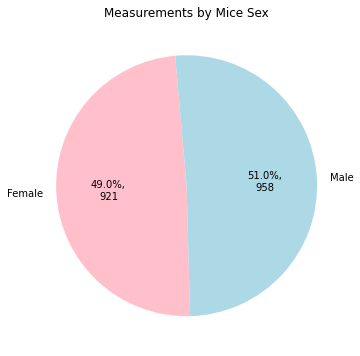

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plot4=plt.pie(my_series,
              labels=my_series.index,
              autopct=lambda x:f'{round(x,1)}%,\n{int(x * total / 100)}', # shh lambda in action 
              startangle=95,
              colors=colors)
plt.title("Measurements by Mice Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

#Instead ....
# we sort cleaned data by "timepoint" arranging latest sample on the top 

In [29]:
clean_df.sort_values(by='Timepoint',ascending=False, inplace=True)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1892,b879,45,72.555239,2,Stelasyn,Female,4,26
1795,s508,45,30.276232,0,Ramicane,Male,1,17
1797,y793,45,31.896238,2,Capomulin,Male,17,17
1798,c766,45,69.823146,4,Placebo,Female,13,26
1799,z578,45,30.638696,0,Ramicane,Male,11,16
...,...,...,...,...,...,...,...,...
163,o302,0,45.000000,0,Placebo,Female,2,29
162,t718,0,45.000000,0,Placebo,Female,10,30
161,w167,0,45.000000,0,Placebo,Female,6,28
160,x773,0,45.000000,0,Placebo,Female,21,30


In [30]:
#than we group by drug regiment and mouse id , and grab top most value for each regiment and mouse  , 
# that would be a last measurement for each mouse

agg_func={'Tumor Volume (mm3)':'first'}
tumor_df=clean_df.groupby(['Drug Regimen','Mouse ID']).agg(agg_func).sort_values("Tumor Volume (mm3)").reset_index()
tumor_df

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Ramicane,k403,22.050126
1,Capomulin,s185,23.343598
2,Capomulin,m601,28.430964
3,Capomulin,x401,28.484033
4,Ramicane,g791,29.128472
...,...,...,...
243,Naftisol,t724,75.113288
244,Stelasyn,m269,75.123690
245,Ketapril,p189,75.294936
246,Naftisol,l725,76.668817


In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# from dataframe above we only pull requred regiment and store in dictionary promising_dic
promising=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
promising_dic={}
for i in promising: 
    promising_dic[i]=tumor_df.loc[tumor_df['Drug Regimen']==i]
promising_dic

{'Capomulin':    Drug Regimen Mouse ID  Tumor Volume (mm3)
 1     Capomulin     s185           23.343598
 2     Capomulin     m601           28.430964
 3     Capomulin     x401           28.484033
 6     Capomulin     f966           30.485985
 9     Capomulin     u364           31.023923
 12    Capomulin     y793           31.896238
 13    Capomulin     r554           32.377357
 15    Capomulin     m957           33.329098
 18    Capomulin     t565           34.455298
 19    Capomulin     w914           36.041047
 24    Capomulin     g288           37.074024
 27    Capomulin     i738           37.311846
 28    Capomulin     j119           38.125164
 31    Capomulin     j246           38.753265
 33    Capomulin     l897           38.846876
 34    Capomulin     b742           38.939633
 35    Capomulin     b128           38.982878
 36    Capomulin     w150           39.952347
 37    Capomulin     g316           40.159220
 38    Capomulin     v923           40.658124
 41    Capomulin     

In [32]:
#data_df.loc[data_df['Mouse ID']=='r157'] # this is for debugging 
# we can pull data from origianl clean_df by mouse an compare last value


 Capomulin  
  quartiles  
 0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64 
 iqr= 7.781863460000004
 UPPER OUTLIER   NO OUTLIERS
 LOWER OUTLIER   NO OUTLIERS
----------------------------------------

 Ramicane  
  quartiles  
 0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64 
 iqr= 9.098536719999998
 UPPER OUTLIER   NO OUTLIERS
 LOWER OUTLIER   NO OUTLIERS
----------------------------------------

 Infubinol  
  quartiles  
 0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64 
 iqr= 11.477135160000003
 UPPER OUTLIER   NO OUTLIERS
 LOWER OUTLIER   
    Drug Regimen Mouse ID  Tumor Volume (mm3)
21    Infubinol     c326           36.321346
----------------------------------------

 Ceftamin  
  quartiles  
 0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64 
 iqr= 15.577752179999997
 UPPER OUTLIER   NO OUTLIER

<function matplotlib.pyplot.show(*args, **kw)>

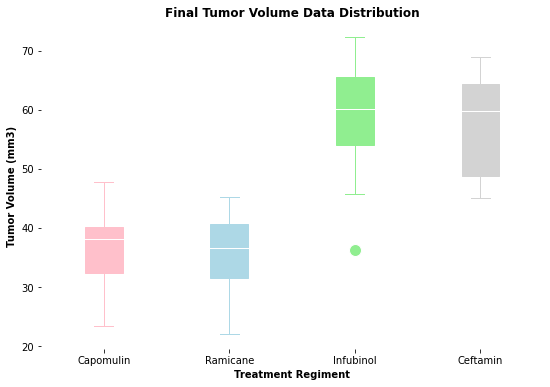

In [33]:
# fun part - get quartiles ,iqr , outliers (1.5*iqr) and box charts for all promising regiments and 
plot5=plt.subplot(111)                                       # setting up group plot
plot5.spines["top"].set_visible(False)    
plot5.spines["bottom"].set_visible(False)    
plot5.spines["right"].set_visible(False)    
plot5.spines["left"].set_visible(False)
colors = ['pink', 'lightblue', 'lightgreen', 'lightgrey']    # colors for plot
for i in promising:                                          # go through each promising regiment 
    data=promising_dic[i]['Tumor Volume (mm3)'] 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes  
# add subset 
# Determine outliers using upper and lower bounds
    quartiles = data.quantile([.25,.5,.75])                  # quartiles
    upperq =quartiles[0.75]
    lowerq =quartiles[0.25]
    iqr = upperq - lowerq                                    # iqr                      
    upper_outlier=promising_dic[i].loc[data>upperq+iqr*1.5]  # finding and storing all upper outliers
    lower_outlier=promising_dic[i].loc[data<lowerq-iqr*1.5]  # finding and storing all lower outliers
    # printing results
    print('\n\033[1m\033[4m', i,'\033[0m \n','\033[1m quartiles \033[0m','\n',quartiles,'\n','\033[1miqr=\033[0m',iqr)
    if upper_outlier.empty:
        print('\033[1m UPPER OUTLIER \033[0m ','NO OUTLIERS')
    else:
        print('\033[1m UPPER OUTLIER \033[0m ','\n',upper_outlier)
    if lower_outlier.empty:
        print('\033[1m LOWER OUTLIER \033[0m ','NO OUTLIERS')
    else:
        print('\033[1m LOWER OUTLIER \033[0m ','\n',lower_outlier)
    print("-"*40)
    c=colors[promising.index(i)]                             # color for each regiment chart
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# "Data-Ink Ratio" applied
    plot5.boxplot(data, 
                  patch_artist=True, widths=0.3,labels=[i],
                  boxprops=dict(facecolor=c, color=c),
                  capprops=dict(color=c),
                  whiskerprops=dict(color=c),
                  flierprops=dict(marker='o',markerfacecolor=c,markeredgecolor="white",markersize=12, label="shown"),
                  medianprops=dict(color='white'),
                  positions=[promising.index(i)])

plt.title("Final Tumor Volume Data Distribution", fontweight="bold")    
plt.xlabel('Treatment Regiment', fontweight="bold")
plt.ylabel('Tumor Volume (mm3)',fontweight='bold')
#plt.label()
plt.show


In [34]:
capomulin_df=clean_df[['Mouse ID','Timepoint','Tumor Volume (mm3)']].loc[clean_df['Drug Regimen']=='Capomulin']

## Line and Scatter Plots - Capomulin Analysis

In [67]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Getting capomulin data in separate Data Frame
capomulin_df=clean_df[['Mouse ID','Timepoint','Tumor Volume (mm3)']].loc[clean_df['Drug Regimen']=='Capomulin']
# grouping by mouse id and timepoint - to get distribution for plots
agg_func={'Tumor Volume (mm3)':'mean'}
time_tumor_df=capomulin_df.groupby(['Mouse ID','Timepoint']).agg(agg_func).sort_values(['Mouse ID','Timepoint']).reset_index()
time_tumor_d

,Mouse ID,Timepoint,Tumor Volume (mm3)
0,b128,0,45.000000
1,b128,5,45.651331
2,b128,10,43.270852
3,b128,15,43.784893
4,b128,20,42.731552
...,...,...,...
225,y793,25,38.992734
226,y793,30,35.726023
227,y793,35,36.327870
228,y793,40,31.475411


In [73]:
# grouping by mouse id and timepoint - to get average data  for plots
agg_func={'Tumor Volume (mm3)':'mean'}
time_average_df=capomulin_df.groupby(['Timepoint']).agg(agg_func).sort_values(['Timepoint']).reset_index()
time_average_df

,Timepoint,Tumor Volume (mm3)
0,0,45.000000
1,5,44.266086
2,10,43.084291
3,15,42.064317
4,20,40.716325
5,25,39.939528
6,30,38.769339
7,35,37.816839
8,40,36.958001
9,45,36.236114


In [68]:
# list of all mice in capomulin data
mouse_arr=list(time_tumor_df['Mouse ID'].unique())
mouse_arr

['b128',
 'b742',
 'f966',
 'g288',
 'g316',
 'i557',
 'i738',
 'j119',
 'j246',
 'l509',
 'l897',
 'm601',
 'm957',
 'r157',
 'r554',
 'r944',
 's185',
 's710',
 't565',
 'u364',
 'v923',
 'w150',
 'w914',
 'x401',
 'y793']

In [152]:
# creating dictionary with plot data for all mice
scatter_dic={}

for i in mouse_arr:
    scatter_dic[i]=time_tumor_df.loc[time_tumor_df['Mouse ID']==i]
scatter_dic['t565']

,Mouse ID,Timepoint,Tumor Volume (mm3)
167,t565,0,45.000000
168,t565,5,45.895647
169,t565,10,46.749006
170,t565,15,44.440949
171,t565,20,39.070214
172,t565,25,37.342210
173,t565,30,32.868916
174,t565,35,33.515671
175,t565,40,33.949341
176,t565,45,34.455298


In [263]:
# tweak offsets to print line labels  
offset={'b128':0.5, 'b742':0.1, 'f966':0, 'g288':-0.4, 'g316':-0.2, 
        'i557':0, 'i738':0, 'j119':0, 'j246':0, 'l509':-0.1,
        'l897':-0.2, 'm601':0.5, 'm957':0, 'r157':0, 'r554':0,
        'r944':0.2, 's185':0, 's710':-0.3, 't565':0, 'u364':0,
        'v923':0.2, 'w150':0, 'w914':-0.5, 'x401':0, 'y793':0}
# setting up colors
colors=["#023fa5", "#7d87b9", "#bec1d4", "#d6bcc0", "#bb7784",
        "#8e063b", "#4a6fe3", "#8595e1", "#b5bbe3", "#e6afb9", 
        "#e07b91", "#d33f6a", "#11c638", "#498c4f", "#c6dec7", 
        "#ead3c6", "#f0b98d", "#ef9708", "#0fcfc0", "#9cded6",
        "#aebfbd", "#f3e1eb", "#f6c4e1", "#f79cd4",'#4949ff']

<function matplotlib.pyplot.show(*args, **kw)>

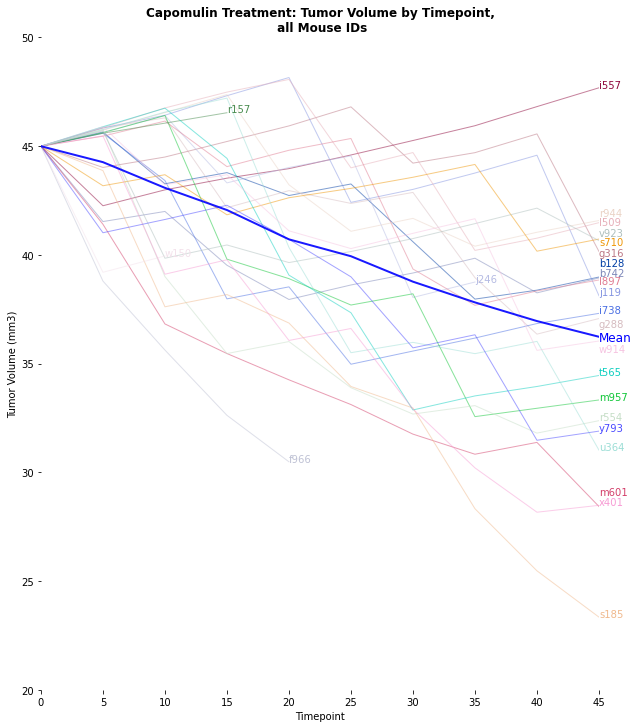

In [264]:
# setting up plot 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 12
plot6= plt.subplot(111)
plot6.spines["top"].set_visible(False)    
plot6.spines["bottom"].set_visible(False)    
plot6.spines["right"].set_visible(False)    
plot6.spines["left"].set_visible(False)

for i in mouse_arr:
    time=scatter_dic[i]['Timepoint']
    tumor=scatter_dic[i]['Tumor Volume (mm3)']
    plot6=plt.plot(time,tumor,
                   color=colors[mouse_arr.index(i)],
                  lw=1, alpha=0.5,
                 # label=i
                  )
    plt.text(time.iloc[-1], (tumor.iloc[-1]+offset[i] ), 
             s=f"{i}" , fontdict=dict(fontsize=10),
            color= colors[mouse_arr.index(i)])
time=time_average_df['Timepoint']
tumor=time_average_df['Tumor Volume (mm3)']
plot6=plt.plot(time,tumor,
                color="blue",
                lw=2, alpha=0.9,
 #             label="AVERAGE"
              )
plt.text(time.iloc[-1], (tumor.iloc[-1]-.2), 
             s="Mean" , fontdict=dict(fontsize=12),
            color= 'blue')
plt.ylim(20, 50)    
plt.xlim(0, 45)
plt.yticks(range(20, 51, 5), fontsize=10)    
plt.xticks(fontsize=10)
plt.title('Capomulin Treatment: Tumor Volume by Timepoint,\n all Mouse IDs', fontweight="bold")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
#plt.xticks(rotation=90)
#plt.legend(loc='lower left')
plt.show

In [265]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# group by mouse ID and aggregate average tumor volume and mouse weight
agg_func={'Tumor Volume (mm3)':'mean','Weight (g)':'mean'}
meanweight_df=clean_df.loc[clean_df['Drug Regimen']=='Capomulin'].groupby(['Mouse ID']).agg(agg_func).sort_values('Weight (g)')
# meanweight_df # debug print

1.3225722434712478e-07


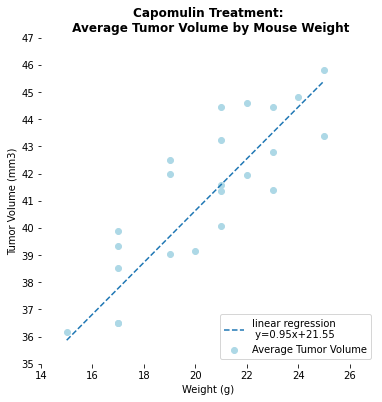

In [260]:
# Plotting scatter plot with linear regression plot
# Data for plot
weight=meanweight_df['Weight (g)']
tumor=meanweight_df['Tumor Volume (mm3)']
# chart size set up
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 6
plot7= plt.subplot(111)
plot7.spines["top"].set_visible(False)    
plot7.spines["bottom"].set_visible(False)    
plot7.spines["right"].set_visible(False)    
plot7.spines["left"].set_visible(False)
plot7=plt.scatter(weight,tumor,
                   color="lightblue",
                   label="Average Tumor Volume" )
plot7=plt.ylim(35, 47)    
plt.xlim(14, 27)
plt.yticks(range(35, 48, 1), fontsize=10)    
plt.xticks(fontsize=10)
plt.title('Capomulin Treatment:\n Average Tumor Volume by Mouse Weight', fontweight="bold")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
tv_slope, tv_int, tv_r, tv_p, tv_std_err = st.linregress(weight, tumor)
# linear regression model
tv_fit = tv_slope * weight + tv_int
# plot linear regression line
plt.plot(weight,tv_fit,"--",label=f"linear regression \n y={tv_slope:.2f}x+{tv_int:.2f}")
plt.legend(loc='lower right')


## Correlation and Regression

In [261]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print('correlation coefficient and linear regression model')
print("-"*40)
print(f'Slope of the regression line = {tv_slope:.2f}')
print(f'Intercept of the regression line = {tv_int:.2f}')
print(f'Correlation coefficient = {tv_r:.2f}')
print(f'p-value = {tv_p}')
print(f'Standard error of the estimated gradient = {tv_std_err:.2f}')


correlation coefficient and linear regression model
----------------------------------------
Slope of the regression line = 0.95
Intercept of the regression line = 21.55
Correlation coefficient = 0.84
p-value = 1.3225722434712478e-07
Standard error of the estimated gradient = 0.13
